In [ ]:
#RealEstate_Price_Prediction end_to_end

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_column', None)

In [3]:
df = pd.read_csv(r'D:\Learn\Real_Estate.csv')

In [4]:
def initial_analysis(df):
    print('Data_Shape:')
    print(df.shape)
    print('Data_Types:')
    print(df.dtypes)
    print('data_ifno:')
    print(df.info())
    print('Data_Sample:')
    print(df.head())
    print('Columns:')
    print(df.columns)
    print('Basic_Stat:')
    print(df.describe(include = 'all'))
    print('Null_Value:')
    print(df.isnull().sum())

In [5]:
initial_analysis(df)

Data_Shape:
(13320, 9)
Data_Types:
area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB
None
Data_Sample:
              area_type   availability                  location       

In [6]:
#we will Drop features that are not required to build our model

l = ['area_type','society','balcony','availability']

df1 = df.drop(l, axis = 1)


In [7]:
#Data Cleaning: Handle NA values, since we have less then 1% NA value in respective col
# we will directly drop respective rows

df2 = df1.dropna()

In [8]:
#Feature Engineering, for feature size we will required int value
# to do so we will add one feature which consist of int value from size

df3 = df2.copy()

df3['bhk'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))

In [9]:
#from initial analysis we Shaw that total sq ft feature given as object it means 
#this is combination of string which should be in float 

def is_float(x):
    
    try:
        float(x)
    except:
        return False
    return True

In [11]:
df3[~df3['total_sqft'].apply(is_float)].head(10)  ##aplly ~ will give us which in not float

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [12]:
# Above shows that total_sqft can be a range (e.g. 2100-2850). 
#For such case we can just take average of min and max value in the range
#there is some other unit as well 'Perch', 'Meter' etc. we will drop that.

def sqft_to_num(x):
    token = x.split('-')
    
    if len(token) == 2:
        return (float(token[0])+float(token[1]))/2
    try:
        return float(x)
    except:
        return None    

In [14]:
df4 = df3.copy()       

df4['total_sqft'] = df4['total_sqft'].apply(sqft_to_num)

# so there are 46 value which is not converted 

df5 =df4[df4.total_sqft.notnull()]

In [15]:
#Add new feature called price per square feet

df6 = df5.copy()

df6['price_per_sqft'] = df6['price']*100000/df5['total_sqft']

In [16]:
#now we are left with location feature which is categorical variable
df6['location'] = df6['location'].apply(lambda x: x.strip())
df6['location'].value_counts()  # so here we have total 1287 diffrent loaction

Whitefield           533
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       264
Thanisandra          235
                    ... 
Vidya Nagar            1
Hanumagiri             1
1 Annasandrapalya      1
Badrappa Layout        1
Chambenahalli          1
Name: location, Length: 1287, dtype: int64

In [17]:
# we cannot apply OneHotEncoding driclty to this feature which will generate 1287 col
# so this we will do Dimensionality Reduction
# Any location having less than 10 data points should be tagged as "other" location

loc_count = df6['location'].value_counts()

loc_count_less_than_10 = loc_count[loc_count <= 10]

In [18]:
df7 =  df6.copy()

df7['location'] = df7['location'].apply(lambda x:'other' if x in loc_count_less_than_10 else x)

len(df7['location'].unique()) 

241

In [19]:
# so now we are left with total 241 unique location

initial_analysis(df7)

Data_Shape:
(13200, 7)
Data_Types:
location           object
size               object
total_sqft        float64
bath              float64
price             float64
bhk                 int64
price_per_sqft    float64
dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 825.0+ KB
None
Data_Sample:
                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka

In [20]:
# Outlier Removal lets remove some unusual value from dataset
# let us assume that for 1bhk at least 300 sq ft required

df7[df7['total_sqft']/df7['bhk'] < 300].head()
# from this we can  see that 8 bedroom constructed in 600 sq ft which is unusual

,location,size,total_sqft,bath,price,bhk,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000


In [21]:
df8 = df7[~(df7.total_sqft/df5.bhk<300)]
# apply ~ we will avoid such unusual value from dataset

In [22]:
#Outlier Removal Using Standard Deviation and Mean
# lets talk about price_per_sqft

df8['price_per_sqft'].describe()
# here we saw thta there is huge flution in price of property
# we will deal with location wise
# we will take one std from mean for each location

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

In [23]:
def remove_pps_outliers(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft>(m-st)) & (subdf.price_per_sqft<=(m+st))]
        df_out = pd.concat([df_out,reduced_df],ignore_index=True)
    return df_out
        
df9 = remove_pps_outliers(df8)

In [24]:
#Let's check if for a given location how does the 2 BHK and 3 BHK property prices look like


def plot_scatter_chart(df,location):
    bhk2 = df[(df.location==location) & (df.bhk==2)]
    bhk3 = df[(df.location==location) & (df.bhk==3)]
    plt.scatter(bhk2.total_sqft,bhk2.price,color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3.total_sqft,bhk3.price,marker='+', color='green',label='3 BHK', s=50)
    plt.xlabel("Total Square Feet Area")
    plt.ylabel("Price (Lakh Indian Rupees)")
    plt.title(location)
    plt.legend()

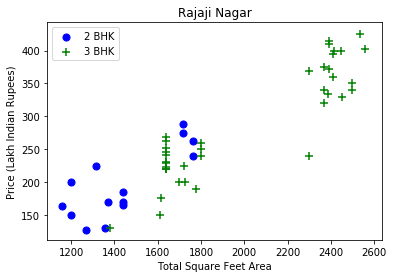

In [25]:
plot_scatter_chart(df9, "Rajaji Nagar")

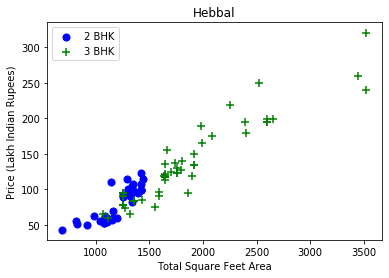

In [26]:
plot_scatter_chart(df9,"Hebbal")

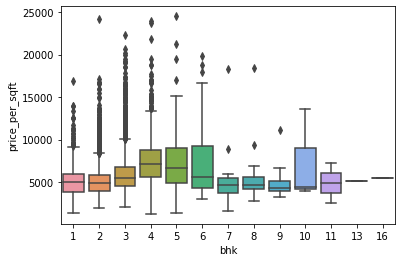

In [27]:
sns.boxplot(x = df9['bhk'], y = df9['price_per_sqft'])  
# here we can see there are so many outliers
#Now we can remove those 2 BHK apartments whose price_per_sqft is 
#less than mean price_per_sqft of 1 BHK apartment and so on

In [28]:
df9['bhk'].unique()

array([ 4,  3,  2,  5,  1,  6,  8,  7,  9, 10, 11, 16, 13], dtype=int64)

In [29]:
def remove_bhk_outliers(df):
    exclude_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'): #first loop will us to filnd bhk for evry location wise
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'): # second loop will help us to compaire
            stats = bhk_stats.get(bhk-1)
            if stats and stats['count']>5:  # here we will select location where for each location atleat 5 unique bhk
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft<(stats['mean'])].index.values)
    return df.drop(exclude_indices,axis='index')

In [30]:
df10 = remove_bhk_outliers(df9)

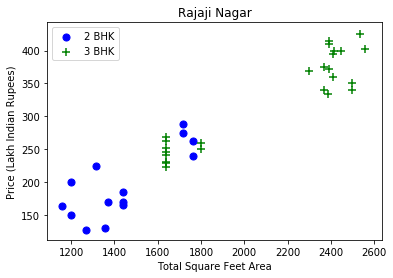

In [31]:
plot_scatter_chart(df10,"Rajaji Nagar")

Text(0, 0.5, 'Count')

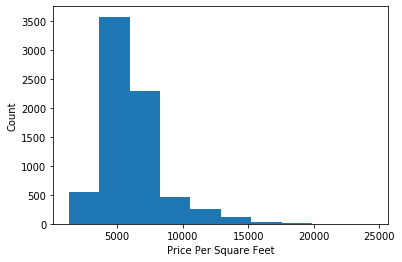

In [32]:
#lets chekc price distribution

plt.hist(df10.price_per_sqft)
plt.xlabel("Price Per Square Feet")
plt.ylabel("Count")

In [33]:
#lets inspect bathroom
df10['bath'].unique()

df10[df10['bath'] > 10].head(10)

#It is unusual to have 2 more bathrooms than number of bedrooms in a home


df10[df10.bath>df10.bhk+2]

# here we will assume that no of bathroom is at most 2 more than no of bedroom

df11 = df10[df10.bath<df10.bhk+2]

In [34]:
#lets drop feature which we was introduce for data cleaning and which will not required to build model

df12 = df11.drop(['size','price_per_sqft'],axis='columns')

In [35]:
#let us use One Hot Encoding For Location

dummies = pd.get_dummies(df12.location)

df13 = pd.concat([df12, dummies.drop('other',axis='columns')],axis='columns')

In [37]:
df14 = df13.drop('location',axis='columns')

In [38]:
initial_analysis(df14)

Data_Shape:
(7239, 244)
Data_Types:
total_sqft             float64
bath                   float64
price                  float64
bhk                      int64
1st Block Jayanagar      uint8
                        ...   
Yelachenahalli           uint8
Yelahanka                uint8
Yelahanka New Town       uint8
Yelenahalli              uint8
Yeshwanthpur             uint8
Length: 244, dtype: object
data_ifno:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7239 entries, 0 to 10241
Columns: 244 entries, total_sqft to Yeshwanthpur
dtypes: float64(3), int64(1), uint8(240)
memory usage: 1.9 MB
None
Data_Sample:
   total_sqft  bath  price  bhk  1st Block Jayanagar  1st Phase JP Nagar  \
0      2850.0   4.0  428.0    4                    1                   0   
1      1630.0   3.0  194.0    3                    1                   0   
2      1875.0   2.0  235.0    3                    1                   0   
3      1200.0   2.0  130.0    3                    1                   0   
4

In [39]:
# Build a Model Now

X = df14.drop(['price'],axis='columns')
y = df14.price

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)


In [41]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
lr_clf.score(X_test,y_test)

0.827025463655259

In [42]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.82702546, 0.86027005, 0.85322178, 0.8436466 , 0.85481502])

In [43]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor()
DT_reg.fit(X_train,y_train)
DT_reg.score(X_test,y_test)

0.8248691806272026

In [44]:
from sklearn.ensemble import RandomForestRegressor
Ran_reg = RandomForestRegressor()
Ran_reg.fit(X_train,y_train)
Ran_reg.score(X_test,y_test)

0.8468331350193232

In [45]:
# lets create one loop where we will get one stop solution

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

def find_best_model_using_gridsearchcv(X,y):
      
    algo = {
        
        'linear_regression': {'model': LinearRegression(), 'params':{'normalize':[True, False]}},
        'lasso':{'model': Lasso(), 'params':{'alpha':[1,2,3], 'selection':['random', 'cyclic']}},
        'decision_tree':{'model':DecisionTreeRegressor(), 'params':{'criterion':['mse','friedman_mse'],'splitter':['best', 'random'] }},
        'randomforestregressor':{'model':RandomForestRegressor(), 'params':{'n_estimators':[10,100,200,300], 'criterion':['mse','friedman_mse']}}
        
        }
    score = []
    
    cv = ShuffleSplit(n_splits = 5, test_size = .20, random_state = 0)
    for algo_name, config in algo.items():
        gs = GridSearchCV(estimator = config['model'], param_grid =config['params'] , cv = cv, return_train_score = False, n_jobs = -1)
        
        gs.fit(X,y)
              
        score.append({
            "model_name": algo_name,
            "best_score": gs.best_score_,
            "best_params": gs.best_params_
            })
        
    return pd.DataFrame(score, columns=['model_name','best_score','best_params'])

In [46]:
find_best_model_using_gridsearchcv(X,y) #Before run this code make sure put n_jobs = -1(for all CPU utilization )  
#its will take comparatively less time to run.

,model_name,best_score,best_params
0,linear_regression,0.847796,{'normalize': False}
1,lasso,0.729078,"{'alpha': 3, 'selection': 'cyclic'}"
2,decision_tree,0.716288,"{'criterion': 'mse', 'splitter': 'best'}"
3,randomforestregressor,0.784781,"{'criterion': 'friedman_mse', 'n_estimators': ..."


In [47]:
def predict_price(location,sqft,bath,bhk):    
    loc_index = np.where(X.columns==location)[0][0]

    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = bhk
    if loc_index >= 0:
        x[loc_index] = 1

    return lr_clf.predict([x])[0]

In [49]:
predict_price('1st Phase JP Nagar',1000, 2, 2)

86.52914257444533

In [50]:
predict_price('Indira Nagar',1000, 3, 3)

171.50679459835052

In [51]:
#Export the tested model to a pickle file, which we will use to create API
import pickle
with open('banglore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf,f)

#Export location and column information to a file that will be useful later on in our prediction application


import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}
with open("columns.json","w") as f:
    f.write(json.dumps(columns))
